### Imbalanced Data
1) When observation in one class is severely higher than the observations in other class/(es) then there exists a class imbalance. This problem is referred to as Imbalanced data problem.

2) When there is severe skewness in the class distribution such as 80:20 majority to minority class ratio or beyond then there exists class imbalance. 

3) The high bias in the data can heavily affect many ML algorithms completely ignoring the minority class. The problem statements concerning imbalanced data are usually the ones where predictions on minority class are considered significant.   


### Handling Imbalanced Data: Best Practices and Approaches
1) <b>Collect More Data:</b><br>
A larger dataset might expose a different and perhaps more balanced perspective on the classes.

2) <b>Try Changing Your Performance Metric:</b><br>
Accuracy is not the metric to use when working with an imbalanced dataset. 

Looking at the following performance measures that can give more insight into the accuracy of the model than traditional classification accuracy:

a) <b>Confusion Matrix:</b> A breakdown of predictions into a table showing correct predictions (the diagonal) and the types of incorrect predictions made (what classes incorrect predictions were assigned).<br>
b) <b>Precision:</b> <br>
c) <b>Recall:</b><br>
d) <b>F1 Score (or F-score):</b> A weighted average of precision and recall.<br>
e) <b>Adjust the decision threshold (ROC, AUC)</b>


3) <b>Boosting Algorithm</b><br>
XGBoost: xgboost offers parameters to balance positive and negative weights using scale_pos_weight

4) <b>Weighting of examples</b><br>
It involves the creation of specific weight vectors in order to improve minority class predictions.

The class-specific weights(class_weight parameter) are calculated per class whereas the test-case-specific weights are calculated for each single instance.

5) <b>Use Stratified CV</b><br>

6) <b>Penalized models</b><br>
There are certain ML algorithms consisting of class_weights parameter to adjust the data imbalance like DecisionTree, RandomForest,  SVM etc.

7) <b>Data Level approach</b><br>
We can perform undersampling or oversampling<br>

a) <b>Under_Sampling</b><br>
Undersampling techniques refer to removing majority class points. Some undersampling techniques are ENN, Random Under Sampling, TomekLinks, etc.

b) <b>OverSampling</b><br>
Oversampling techniques refer to creating artificial minority class points. Some oversampling techniques are Random Over Sampling, ADASYN, SMOTE, etc.


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [18]:
dt1 = DecisionTreeClassifier(class_weight=[0.5,0.5])
rf1 = RandomForestClassifier(class_weight=[0.4,0.6])

In [ ]:
## Cross Validation 

# x_traiin,x_test

In [ ]:
# 1000 review: 60% Class - good , 40% Class - bad 
# good : 600 rows
# bad : 400 rows

# split : 70  and 30
# Train : 700 rows
# Test :  300 rows

# After Stratified sampling
# Train : 700 rows => 60% Class 1, 40% Class 2
# Test : 300 rows => 60% Class 1, 40% Class 2


In [19]:
!pip install imblearn

In [22]:
import imblearn

In [23]:
from sklearn import *

### Install imblearn

1) In Anaconda prompt, write the follwing<br>
<b>conda install -c conda-forge imbalanced-learn</b><br>
https://anaconda.org/conda-forge/imbalanced-learn

2) In CMD<br>
<b>pip install imblearn</b>

3) In Jupyter<br>
<b>!pip install imblearn</b>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [26]:
def gen_metrics(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    y_pred = model.predict(x_test)
    print('Predictions\n',y_pred)
    acc = accuracy_score(y_test,y_pred)
    print('Training score',train_score)
    print('Testing score',test_score)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

In [27]:
from sklearn.datasets import make_classification, make_regression

In [8]:
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(1000, 2)
(1000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
x,y = make_classification(n_samples=1000,n_features=2,n_redundant=0, ## useless = redundant feature 
                          weights=[0.9,0.1],n_classes=2,random_state=1)

In [28]:
from collections import Counter
c1 = Counter(y)
print(c1)

Counter({0: 892, 1: 108})


In [29]:
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [32]:
x[:5]

array([[-0.4950081 ,  1.3185973 ],
       [-0.53099717,  0.90118241],
       [ 0.98277596, -1.59111159],
       [-1.03203853, -0.80116218],
       [-2.87864998,  3.01710424]])

In [33]:
c1 = Counter(y)
print(c1)
maj_per = 892/(892+108)
min_per = 108/(892+108)
print('Per_Maj_Class',maj_per)
print('Per_Min_Class',min_per)

Counter({0: 892, 1: 108})
Per_Maj_Class 0.892
Per_Min_Class 0.108


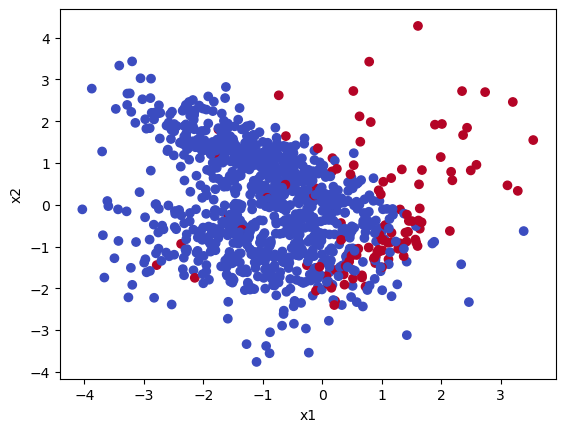

In [34]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='coolwarm')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                                 random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(750, 2)
(250, 2)
(750,)
(250,)


In [37]:
c2 = Counter(y_train)
print(c2)
c3 = Counter(y_test)
print(c3)

Counter({0: 674, 1: 76})
Counter({0: 218, 1: 32})


In [38]:
y_train_major = 674/(674+76)
print(y_train_major)
y_test_major = 218/(218+32)
print(y_test_major)

0.8986666666666666
0.872


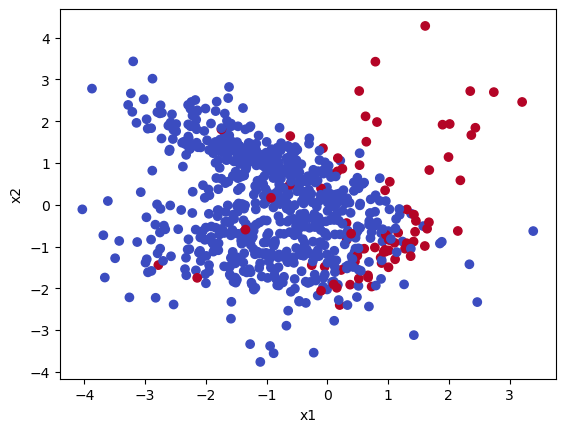

In [39]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap='coolwarm')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [40]:
m1 = LogisticRegression(max_iter=1000)
gen_metrics(m1,x_train,x_test,y_train,y_test)

Predictions
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0]
Training score 0.916
Testing score 0.924
Accuracy_Score 0.924
Confusion Matrix
 [[217   1]
 [ 18  14]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       218
           1       0.93      0.44      0.60        32

    accuracy                           0.92       250
   macro avg       0.93      0.72      0.78       250
weighted avg       0.92      0.92      0.91       250



### OverSampling
<img src="oversampling.png" align="left">

In [41]:
from imblearn.over_sampling import RandomOverSampler

In [43]:
Counter(y_train)

Counter({0: 674, 1: 76})

In [44]:
over = RandomOverSampler(sampling_strategy=0.8)
# sampling_strategy = no_of_min/no_of_maj = 0.8  
x_over, y_over = over.fit_resample(x_train,y_train)

In [47]:
c2 = Counter(y_over)
print(c2)
maj_per = 674/(674+539)
min_per = 539/(674+539)
print('Per_Maj_Class',maj_per*100)
print('Per_Min_Class',min_per*100)

Counter({0: 674, 1: 539})
Per_Maj_Class 55.56471558120363
Per_Min_Class 44.43528441879637


In [48]:
print(539/674)

0.7997032640949555


In [49]:
print(x_over.shape)
print(x_test.shape)
print(y_over.shape)
print(y_test.shape)

(1213, 2)
(250, 2)
(1213,)
(250,)


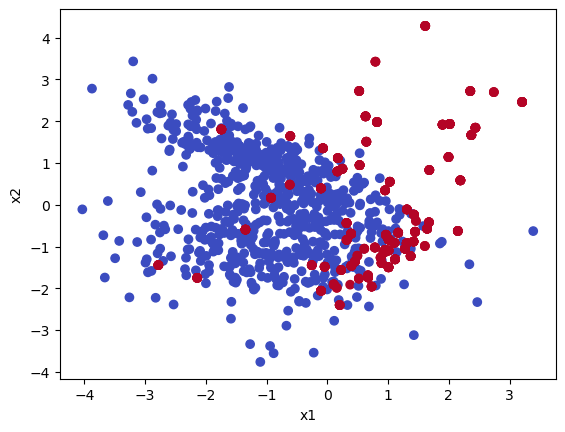

In [51]:
plt.scatter(x_over[:,0],x_over[:,1],c=y_over,cmap='coolwarm')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [52]:
m2 = LogisticRegression(max_iter=1000)
gen_metrics(m2,x_over,x_test,y_over,y_test)

Predictions
 [0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1
 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0]
Training score 0.832646331409728
Testing score 0.844
Accuracy_Score 0.844
Confusion Matrix
 [[185  33]
 [  6  26]]
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.85      0.90       218
           1       0.44      0.81      0.57        32

    accuracy                           0.84       250
   macro avg       0.70      0.83      0.74       250
weighted avg       0.90      0.84      0.86       250



### UnderSampling

<img src="undersampling.png" align="left">

In [53]:
from imblearn.under_sampling import RandomUnderSampler

In [54]:
Counter(y_train)

Counter({0: 674, 1: 76})

In [55]:
under = RandomUnderSampler(sampling_strategy=0.7)
# sampling_stretegy =  no_of_min/no_of_maj
x_under,y_under = under.fit_resample(x_train,y_train)

In [56]:
c3 = Counter(y_under)
print(c3)
maj_per = 108/(108+76)
min_per = 76/(108+76)
print('Per_Maj_Class',maj_per*100)
print('Per_Min_Class',min_per*100)

Counter({0: 108, 1: 76})
Per_Maj_Class 58.69565217391305
Per_Min_Class 41.30434782608695


In [57]:
print(76/108)

0.7037037037037037


In [58]:
print(x_under.shape)
print(x_test.shape)
print(y_under.shape)
print(y_test.shape)

(184, 2)
(250, 2)
(184,)
(250,)


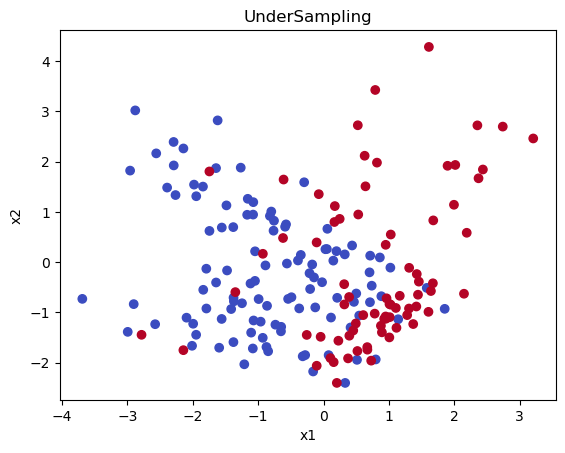

In [59]:
plt.scatter(x_under[:,0],x_under[:,1],c=y_under,cmap='coolwarm')
plt.title('UnderSampling')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [60]:
m3 = LogisticRegression(max_iter=1000)
gen_metrics(m3,x_under,x_test,y_under,y_test)

Predictions
 [0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1
 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0]
Training score 0.8043478260869565
Testing score 0.868
Accuracy_Score 0.868
Confusion Matrix
 [[193  25]
 [  8  24]]
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.89      0.92       218
           1       0.49      0.75      0.59        32

    accuracy                           0.87       250
   macro avg       0.72      0.82      0.76       250
weighted avg       0.90      0.87      0.88       250



### SMOTE (Synthetic Minority OverSampling Technique)

1) Unlike random oversampling that only duplicates some random examples from the minority class, SMOTE generates examples based on the distance of each data (usually using Euclidean distance) and the minority class nearest neighbors, so the generated examples are different from the original minority class.<br>
2)  Steps in SMOTE

    a) Identify the minority class vector.                                                      
    b) Decide the number of nearest numbers (k), to consider.                                                             
    c) Compute a line between the minority data points and any of its neighbors and place a synthetic  point.                                      
    d) Repeat step 3 for all minority data points and their k neighbors, till the data is balanced.                                                  

<img src="smote2.png" align="left">

In [61]:
from imblearn.over_sampling import SMOTE, ADASYN

In [62]:
print(Counter(y_train))

Counter({0: 674, 1: 76})


In [63]:
sm = SMOTE()
x_sm,y_sm = sm.fit_resample(x_train,y_train)

In [64]:
c4 = Counter(y_sm)
print(c4)
# per = 50 : 50

Counter({0: 674, 1: 674})


In [65]:
print(x_sm.shape)
print(x_test.shape)
print(y_sm.shape)
print(y_test.shape)

(1348, 2)
(250, 2)
(1348,)
(250,)


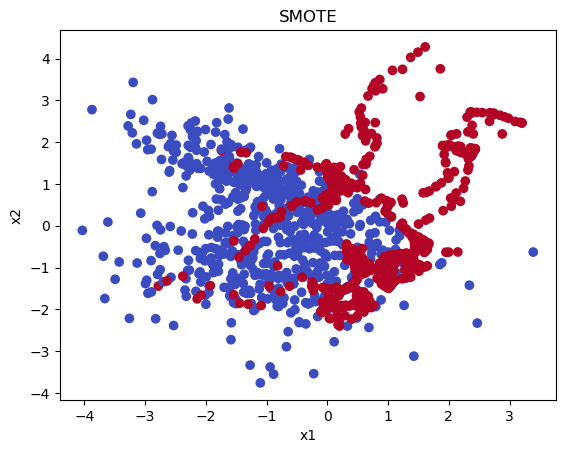

In [66]:
plt.scatter(x_sm[:,0],x_sm[:,1],c=y_sm,cmap='coolwarm')
plt.title('SMOTE')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [68]:
m4 = LogisticRegression(max_iter=1000)
gen_metrics(m4,x_sm,x_test,y_sm,y_test)


Predictions
 [0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1
 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0]
Training score 0.8419881305637982
Testing score 0.836
Accuracy_Score 0.836
Confusion Matrix
 [[182  36]
 [  5  27]]
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.83      0.90       218
           1       0.43      0.84      0.57        32

    accuracy                           0.84       250
   macro avg       0.70      0.84      0.73       250
weighted avg       0.90      0.84      0.86       250



### Other Methods

#### ADASYN (Adaptive Synthetic Sampling)
1) It is an oversampling technique<br>
2) Generate more synthetic examples in regions of the feature space where the density of minority examples is low, and fewer or none where the density is high.<br>

#### BorderLineSMOTE
1) This algorithm starts by classifying the minority class observations. It classifies any minority observation as a noise point if all the neighbors are the majority class and such an observation is ignored while creating synthetic data.<br>
2) It classifies a few points as border points that have both majority and minority class as neighborhood and resample completely from these points (Extreme observations on which a support vector will typically pay attention to)

<img src="borderline_smote.png" align="left" height="350" width="350">

#### TomekLinks
1) Tomek Links is an undersampling approach that identifies all the pairs of data points that are nearest to each other but belong to different classes, and these pairs (suppose a and b) are termed as Tomek links. Tomek Links follows these conditions:

    a and b are nearest neighbors of each other
    a and b belong to two different classes
    
2) These Tomek links points (a, b) are present on the boundary of separation of the two classes. So removing the majority class of Tomek links points increases the class separation, and also reduces the number of majority class samples along the boundary of the majority cluster.
<img src="tomek_links.png">

#### SMOTETOMEK
A hybrid method which is a mixture of the above two methods, it uses an under-sampling method (Tomek) with an oversampling method (SMOTE). 

In [72]:
from imblearn.over_sampling import ADASYN, BorderlineSMOTE
from imblearn.under_sampling import TomekLinks

In [73]:
from imblearn.combine import SMOTETomek, SMOTEENN

In [74]:
# ENN - Edited Nearest Neighbor

In [74]:
smtom = SMOTETomek(sampling_strategy=0.8)
x_smtom,y_smtom = smtom.fit_resample(x_train,y_train)

In [75]:
x_smtom[:10]

array([[-2.15163352,  1.48473127],
       [-0.73584899, -1.24302955],
       [-2.6178068 ,  1.89482386],
       [-0.55170143, -1.39106482],
       [-1.23580317, -0.54239748],
       [ 0.3642719 ,  0.04893796],
       [-0.0074332 ,  0.4154785 ],
       [ 0.05420936,  0.71652457],
       [-0.04680901, -0.96857592],
       [-1.39332564, -0.90457212]])

In [76]:
print(Counter(y_smtom))
print(498/633)

Counter({0: 638, 1: 503})
0.7867298578199052


In [77]:
m5 = LogisticRegression(max_iter=1000)
gen_metrics(m5,x_smtom,x_test,y_smtom,y_test)

Predictions
 [0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1
 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0]
Training score 0.8641542506573181
Testing score 0.852
Accuracy_Score 0.852
Confusion Matrix
 [[186  32]
 [  5  27]]
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.85      0.91       218
           1       0.46      0.84      0.59        32

    accuracy                           0.85       250
   macro avg       0.72      0.85      0.75       250
weighted avg       0.91      0.85      0.87       250

